## Gaussian Process Regression
### 1. Introduction
### 2. Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF 
from sklearn.model_selection import train_test_split

In [2]:
# pandas will automatically convert the 'NaN' values to np.nan
red_ball_coordinates = pd.read_csv('data/red_ball_coordinates_128px_017.csv', delimiter=',')
red_ball_coordinates

,u0,v0,u1,v1,u2,v2,u3,v3,u4,v4,u5,v5,u6,v6
0,NaN,NaN,NaN,NaN,NaN,NaN,52.880000,83.240000,NaN,NaN,59.0,69.5,68.666667,118.333333
1,NaN,NaN,NaN,NaN,NaN,NaN,51.041667,83.125000,NaN,NaN,NaN,NaN,68.428571,118.571429
2,NaN,NaN,NaN,NaN,125.882353,91.411765,49.833333,82.333333,NaN,NaN,NaN,NaN,68.428571,118.571429
3,NaN,NaN,NaN,NaN,124.647059,89.617647,47.416667,81.916667,NaN,NaN,NaN,NaN,68.428571,118.571429
4,40.500000,127.500000,84.500000,127.500000,123.673913,88.739130,45.909091,81.787879,NaN,NaN,NaN,NaN,68.428571,118.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,82.675000,113.975000,12.000000,72.000000,55.000000,23.750000,84.764706,66.970588,NaN,NaN,60.5,69.0,68.500000,119.500000
1869,81.043478,116.130435,12.000000,72.000000,55.000000,23.750000,82.909091,68.666667,NaN,NaN,60.5,69.0,68.500000,119.500000
1870,77.923077,119.846154,120.285714,123.333333,55.000000,23.750000,79.690476,71.452381,NaN,NaN,60.5,69.0,68.500000,119.500000
1871,79.543478,118.347826,113.777778,118.666667,55.000000,23.750000,81.096774,70.322581,NaN,NaN,60.5,69.0,68.500000,119.500000


In [3]:
xyz_coordinates = pd.read_csv('data/positions_xyz_128px_017.csv', delimiter=',')
xyz_coordinates

,x,y,z
0,6.000000,4.000000,14.00000
1,6.000000,7.000000,14.00000
2,6.000000,7.000000,14.00000
3,6.000000,7.000000,14.00000
4,6.169909,6.993336,14.07999
...,...,...,...
1872,3.642321,5.456923,12.76173
1873,3.751164,5.628386,12.83502
1874,3.867227,5.792615,12.90916
1875,3.990135,5.948880,12.98405


In [4]:
# remove the first rows of xyz_coordinates
xyz_coordinates = xyz_coordinates.iloc[4:]
xyz_coordinates = xyz_coordinates.reset_index(drop=True)
xyz_coordinates

,x,y,z
0,6.169909,6.993336,14.07999
1,6.339272,6.973373,14.15992
2,6.507547,6.940200,14.23974
3,6.674192,6.893964,14.31939
4,6.838673,6.834871,14.39882
...,...,...,...
1868,3.642321,5.456923,12.76173
1869,3.751164,5.628386,12.83502
1870,3.867227,5.792615,12.90916
1871,3.990135,5.948880,12.98405


In [5]:
combined_data = []
# combine the two dataframes
if red_ball_coordinates.shape[0] == xyz_coordinates.shape[0]:
    combined_data = pd.concat([red_ball_coordinates, xyz_coordinates], axis=1)
combined_data

,u0,v0,u1,v1,u2,v2,u3,v3,u4,v4,u5,v5,u6,v6,x,y,z
0,NaN,NaN,NaN,NaN,NaN,NaN,52.880000,83.240000,NaN,NaN,59.0,69.5,68.666667,118.333333,6.169909,6.993336,14.07999
1,NaN,NaN,NaN,NaN,NaN,NaN,51.041667,83.125000,NaN,NaN,NaN,NaN,68.428571,118.571429,6.339272,6.973373,14.15992
2,NaN,NaN,NaN,NaN,125.882353,91.411765,49.833333,82.333333,NaN,NaN,NaN,NaN,68.428571,118.571429,6.507547,6.940200,14.23974
3,NaN,NaN,NaN,NaN,124.647059,89.617647,47.416667,81.916667,NaN,NaN,NaN,NaN,68.428571,118.571429,6.674192,6.893964,14.31939
4,40.500000,127.500000,84.500000,127.500000,123.673913,88.739130,45.909091,81.787879,NaN,NaN,NaN,NaN,68.428571,118.571429,6.838673,6.834871,14.39882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,82.675000,113.975000,12.000000,72.000000,55.000000,23.750000,84.764706,66.970588,NaN,NaN,60.5,69.0,68.500000,119.500000,3.642321,5.456923,12.76173
1869,81.043478,116.130435,12.000000,72.000000,55.000000,23.750000,82.909091,68.666667,NaN,NaN,60.5,69.0,68.500000,119.500000,3.751164,5.628386,12.83502
1870,77.923077,119.846154,120.285714,123.333333,55.000000,23.750000,79.690476,71.452381,NaN,NaN,60.5,69.0,68.500000,119.500000,3.867227,5.792615,12.90916
1871,79.543478,118.347826,113.777778,118.666667,55.000000,23.750000,81.096774,70.322581,NaN,NaN,60.5,69.0,68.500000,119.500000,3.990135,5.948880,12.98405


### 3. Data Preprocessing

In [6]:
# split into features and target
X = combined_data.iloc[:, :14]
y = combined_data.iloc[:, 14:]

In [7]:
from sklearn.impute import SimpleImputer
# scale the features and the target
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

#### 3.1. Impute the NaN values with mean SimpleImputer

In [8]:
imputer = SimpleImputer(strategy='mean')
X_imputed_mean = imputer.fit_transform(X_scaled)
y_imputed_mean = imputer.fit_transform(y_scaled)

#### 3.2. Impute the NaN values with median SimpleImputer

In [9]:
imputer = SimpleImputer(strategy='median')
X_imputed_median = imputer.fit_transform(X_scaled)
y_imputed_median = imputer.fit_transform(y_scaled)

### 3.3. Impute the NaN values with KNNImputer

In [10]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(y)

### 4. Gaussian Process Regression

In [11]:
kernel = 1.0 * RBF(length_scale=1.0)
gp = GaussianProcessRegressor(kernel=kernel, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=10)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed_mean, y_imputed_mean, test_size=0.2, random_state=42)
gp.fit(X_train, y_train)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=10)

In [57]:
# Make predictions on the test data
y_pred, sigma = gp.predict(X_test, return_std=True)

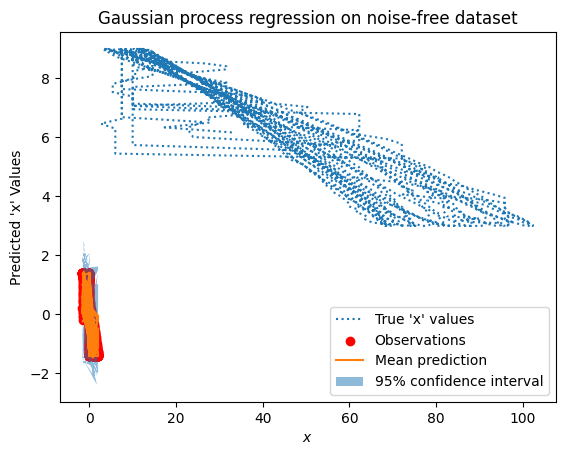

In [64]:
plt.plot(X_imputed[:, 0], y_imputed[:, 0], label="True 'x' values", linestyle="dotted")
plt.scatter(X_train[:, 0], y_train[:, 0], label="Observations", color="red")
plt.plot(X_test[:, 0], y_pred[:, 0], label="Mean prediction")
plt.fill_between(
    X_test[:, 0],
    y_pred[:, 0] - 1.96 * sigma[:, 0],
    y_pred[:, 0] + 1.96 * sigma[:, 0],
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("Predicted 'x' Values")
plt.title("Gaussian process regression on noise-free dataset")
plt.show()
